# Study of Flight Departures, Arrivals, Cancellations, Delays and Diversions from 2019 to 2023

**Submitted by:** Naveen Sai Tamanampudi

**Student ID:** 11749798

**Course:** INFO5709 Section 001 Data Visualization and Communication

**Project:** 3


## Exploratory Data Analysis(EDA)

After performing the data preprocessing and splitting the dataset into 3 parts namely "Cleaned-Regular Flights.csv", "Cleaned-Cancelled Flights.csv" and "Cleaned-Diverted Flights.csv" using Power BI, I am using python to perform EDA using python to gain understanding about the dataset, remove outliers and form Hypothesis regarding the data. The data will be loaded back into the Power BI to create visualizations to answer the hypothesis. 

I am importing numpy, pandas to work with arrays and dataframes. Matplotlib and seaborn are used to produce EDA visualizations.

In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

I am setting max columns to None to display all the columns of dataset instead of first and last few columns

In [2]:
pd.set_option('display.max_columns', None)

## EDA on Regular Flights

In [3]:
#loading the regular flights data
regular=pd.read_csv("Cleaned-Regular Flights.csv")

In [4]:
#viewing the first 5 rows of the dataframe
regular.head()

,ID,Date,Airline,Origin,Destination,CRS Departure Time,Departure Time,Departure Delay,CRS Arrival Time,Arrival Time,Arrival Delay,CRS Elapsed Time,Elapsed Time,Air Time,Distance,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_ Late Aircraft
0,733,2/17/2023 0:00,Southwest Airlines Co.,Las Vegas,Reno,12/30/1899 10:25:00 AM,12/30/1899 10:20:00 AM,-5,12/30/1899 11:55:00 AM,12/30/1899 11:31:00 AM,-24,90,71,52,345,0,0,0,0,0
1,1278,1/2/2021 0:00,Southwest Airlines Co.,Cincinnati,Baltimore,12/30/1899 5:55:00 AM,12/30/1899 5:50:00 AM,-5,12/30/1899 7:25:00 AM,12/30/1899 7:06:00 AM,-19,90,76,61,430,0,0,0,0,0
2,1697,9/22/2019 0:00,Southwest Airlines Co.,Los Angeles,San Francisco,12/30/1899 11:10:00 AM,12/30/1899 11:05:00 AM,-5,12/30/1899 12:40:00 PM,12/30/1899 12:10:00 PM,-30,90,65,51,337,0,0,0,0,0
3,1755,9/8/2021 0:00,Southwest Airlines Co.,Minneapolis,Chicago,12/30/1899 6:25:00 AM,12/30/1899 6:20:00 AM,-5,12/30/1899 7:55:00 AM,12/30/1899 7:35:00 AM,-20,90,75,59,349,0,0,0,0,0
4,3328,5/30/2022 0:00,Southwest Airlines Co.,St. Louis,Cleveland,12/30/1899 9:20:00 AM,12/30/1899 9:15:00 AM,-5,12/30/1899 11:50:00 AM,12/30/1899 11:37:00 AM,-13,90,82,70,487,0,0,0,0,0


In [5]:
#shape
print("Number of rows:",regular.shape[0])
print("Number of columns:",regular.shape[1])

Number of rows: 97148
Number of columns: 20


### Univariate Non-Graphical EDA

Below code provides information about the non-null values and data type of each column in the dataset

In [6]:
regular.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97148 entries, 0 to 97147
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   ID                    97148 non-null  int64 
 1   Date                  97148 non-null  object
 2   Airline               97148 non-null  object
 3   Origin                97148 non-null  object
 4   Destination           97148 non-null  object
 5   CRS Departure Time    97148 non-null  object
 6   Departure Time        97148 non-null  object
 7   Departure Delay       97148 non-null  int64 
 8   CRS Arrival Time      97148 non-null  object
 9   Arrival Time          97148 non-null  object
 10  Arrival Delay         97148 non-null  int64 
 11  CRS Elapsed Time      97148 non-null  int64 
 12  Elapsed Time          97148 non-null  int64 
 13  Air Time              97148 non-null  int64 
 14  Distance              97148 non-null  int64 
 15  Delay_Carrier         97148 non-null

Below code provides the count, mean, standard deviation and 5 values of a box plot namely minimum, Quartile-1, Median, Quartile-3 and Maximum of that column

In [7]:
regular.drop(["ID"],axis=1).describe()

,Departure Delay,Arrival Delay,CRS Elapsed Time,Elapsed Time,Air Time,Distance,Delay_Carrier,Delay_Weather,Delay_NAS,Delay_Security,Delay_ Late Aircraft
count,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000,97148.000000
mean,10.094032,4.353759,142.818318,137.078643,112.716052,813.824865,4.613909,0.717246,2.467874,0.025816,4.600681
std,49.146321,51.360244,71.968138,72.041746,70.104490,591.562015,32.429247,13.000768,15.405864,1.438882,24.899006
min,-81.000000,-88.000000,20.000000,17.000000,9.000000,29.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-6.000000,-15.000000,90.000000,85.000000,62.000000,386.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-2.000000,-7.000000,125.000000,120.000000,95.000000,657.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,6.000000,7.000000,173.000000,168.000000,142.000000,1050.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1512.000000,1520.000000,695.000000,706.000000,669.000000,5812.000000,1473.000000,1285.000000,1207.000000,249.000000,1018.000000


### Univariate Graphical EDA

**Categorical Data:** I have plotted barplots for categorical data to understand which airline/city is accounting to most flights. I have plotted a line chart to see the trend of number of flights over the years

**For the dates column:** This gives the information about number of flights per year. I have extracted counts for each year and plotted a line chart

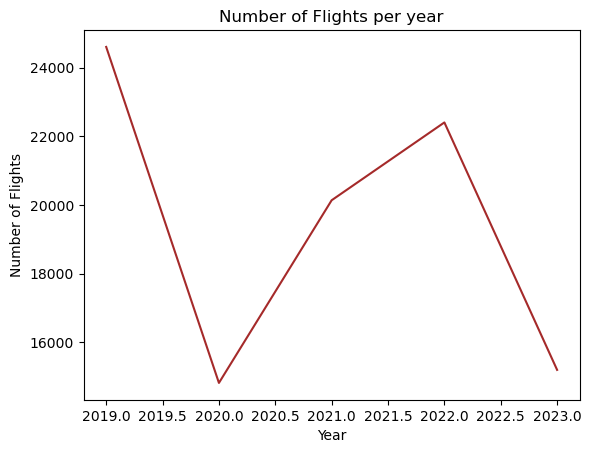

In [8]:
#Extract years to plot a graph
dates = pd.to_datetime(regular['Date'])
years = dates.dt.year
#getting years and counts
year=years.value_counts(sort=False).sort_index().index.values
count=years.value_counts(sort=False).sort_index().values
#Plotting a line plot
plt.plot(year, count, color="brown")
#setting names to the axes
plt.xlabel("Year")
plt.ylabel("Number of Flights")
#setting title
plt.title("Number of Flights per year")
plt.savefig('Output/Regular-Year.png',bbox_inches='tight')
plt.show()

**For the Airline column:** This gives the information about number of flights that each airline operated

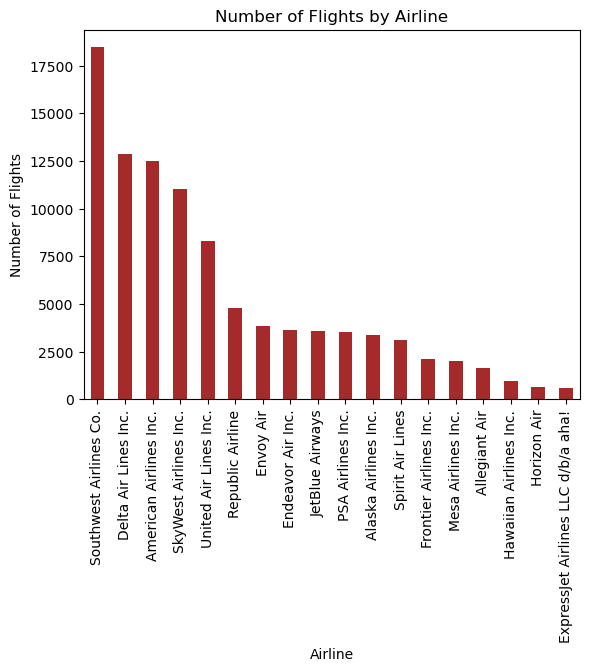

In [9]:
#plotting a bar plot
regular['Airline'].value_counts().plot.bar(color="brown")
#setting names to the axes
plt.xlabel("Airline")
plt.ylabel("Number of Flights")
#setting title
plt.title("Number of Flights by Airline")
plt.savefig('Output/Regular-Airline.png',bbox_inches='tight')
plt.show()

**For the Origin column:** This gives the information about number of flights from a particular city.

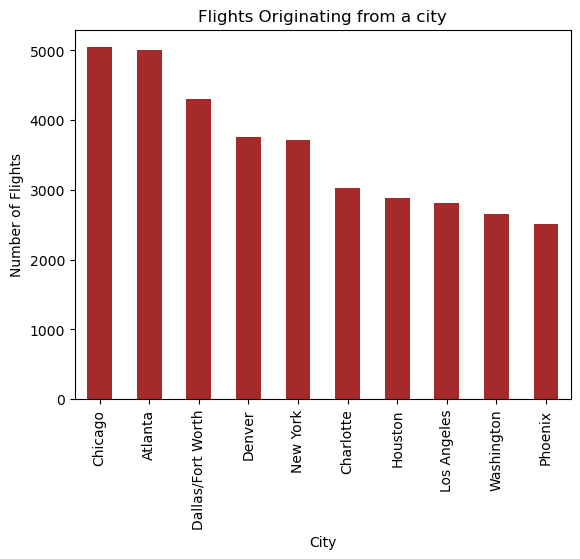

In [10]:
#plotting a bar plot
regular['Origin'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Flights")
#setting the title
plt.title("Flights Originating from a city")
plt.savefig('Output/Regular-Origin.png',bbox_inches='tight')
plt.show()

**For the Destination column:** This gives the information about number of flights to a particular city

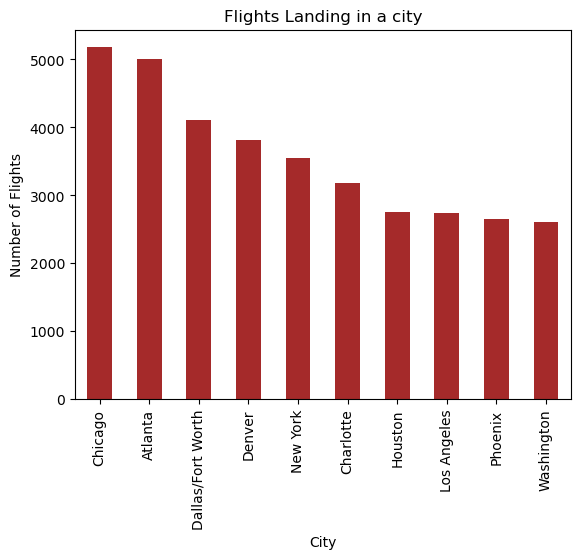

In [11]:
#plotting a bar plot
regular['Destination'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Flights")
#setting the title
plt.title("Flights Landing in a city")
plt.savefig('Output/Regular-Destination.png',bbox_inches='tight')
plt.show()

**Numerical Data:** I have plotted histograms to see the distribution of the data. If the tail seems too long, then I plotted boxplot to see the outliers.

**Arrival Delay:** This histogram gives the distribution of arrival delay

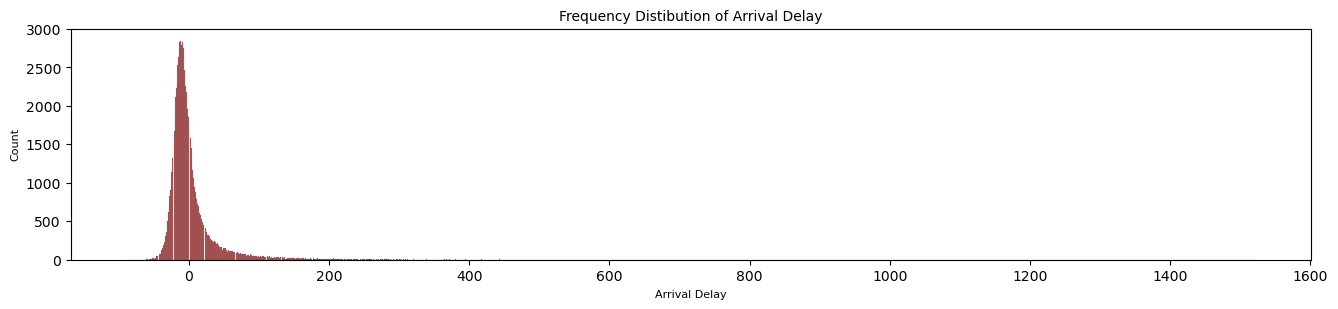

In [12]:
#Setting figure size
plt.figure(figsize=(16,3))
#Plotting a histogram
sns.histplot(regular['Arrival Delay'], color="brown")
#Setting title
plt.title('Frequency Distibution of Arrival Delay', fontsize=10)
#Setting axes labels
plt.xlabel("Arrival Delay", fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.savefig('Output/Regular-Arrival.png',bbox_inches='tight')
plt.show()

**Departure Delay:** This histogram gives the distribution of Departure delay

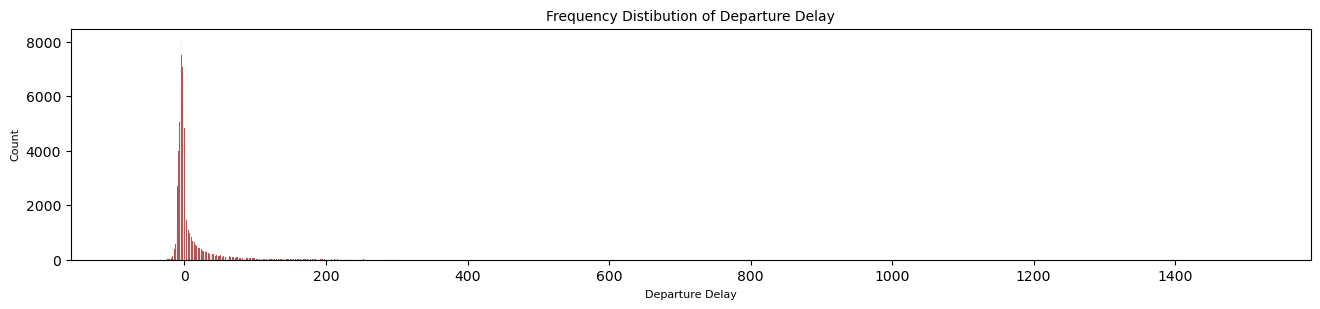

In [13]:
#Setting figure size
plt.figure(figsize=(16,3))
#Plotting a histogram
sns.histplot(regular['Departure Delay'], color="brown")
#Setting title
plt.title('Frequency Distibution of Departure Delay', fontsize=10)
#Setting axes labels
plt.xlabel("Departure Delay", fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.savefig('Output/Regular-Departure.png',bbox_inches='tight')
plt.show()

**Elapsed Time:** This histogram gives the distribution of Elapsed Time

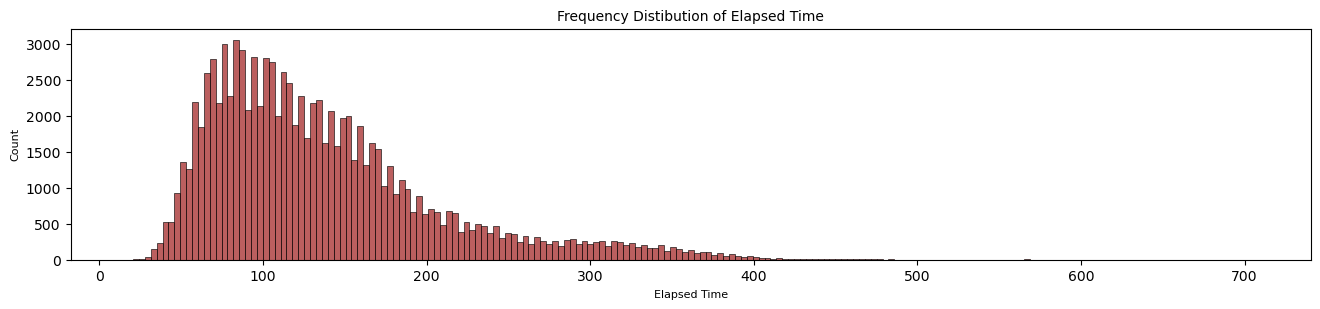

In [14]:
#Setting figure size
plt.figure(figsize=(16,3))
#Plotting a histogram
sns.histplot(regular['Elapsed Time'], color="brown")
#Setting title
plt.title('Frequency Distibution of Elapsed Time', fontsize=10)
#Setting axes labels
plt.xlabel("Elapsed Time", fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.savefig('Output/Regular-Elapsed Time.png',bbox_inches='tight')
plt.show()

**Distance:** This histogram gives the distribution of Distance

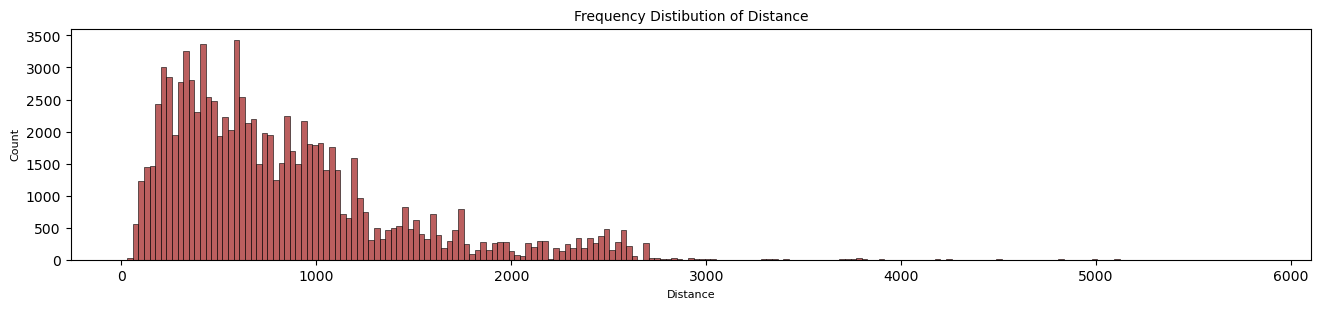

In [15]:
#Setting figure size
plt.figure(figsize=(16,3))
#Plotting a histogram
sns.histplot(regular['Distance'], color="brown")
#Setting title
plt.title('Frequency Distibution of Distance', fontsize=10)
#Setting axes labels
plt.xlabel("Distance", fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.savefig('Output/Regular-Distance.png',bbox_inches='tight')
plt.show()

**Air Time:** This histogram gives the distribution of Air Time

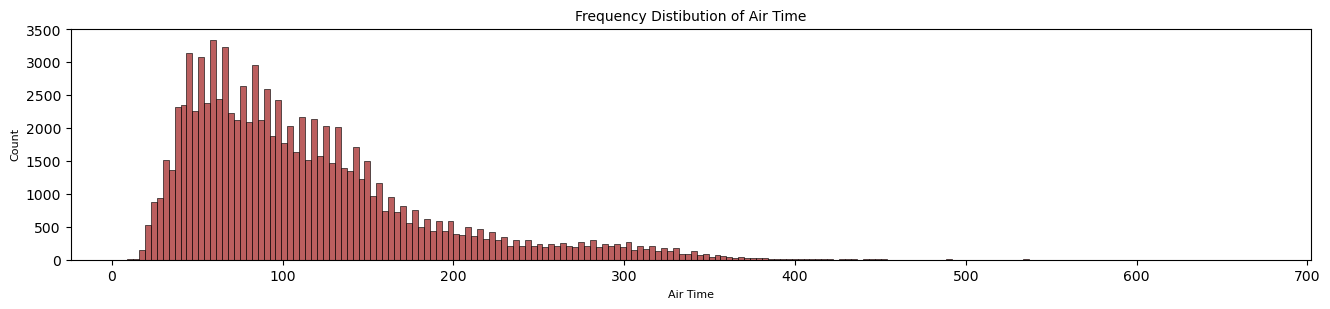

In [16]:
#Setting figure size
plt.figure(figsize=(16,3))
#Plotting a histogram
sns.histplot(regular['Air Time'], color="brown")
#Setting title
plt.title('Frequency Distibution of Air Time', fontsize=10)
#Setting axes labels
plt.xlabel("Air Time", fontsize=8)
plt.ylabel('Count', fontsize=8)
plt.savefig('Output/Regular-Air Time.png',bbox_inches='tight')
plt.show()

From the histograms above, we can see that the data is heavily left-skewed. There are some outliers. But I am not going to remove any outliers based on "Elapsed Time", "Distance", and "Air Time" because the real flights has indeed flew for that long. The longest flight in USA is 5085 miles from Honolulu to the East Coast. So, this provides a valid reason not to remove any outliers from the data. But I want to plot box plots on Arrival Delay and Departure Delay to remove some outliers as the highest delay is close to 25hrs which will not happen most of the time.

**Box plots on Arrival Delay and Departure Delay**

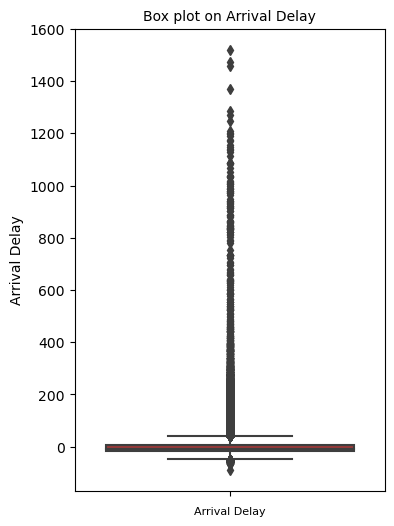

In [17]:
#Setting plot size
plt.figure(figsize=(4,6))
#Creating box plot
sns.boxplot(y=regular["Arrival Delay"], color="brown")
#Setting Title
plt.title('Box plot on Arrival Delay', fontsize=10)
#Setting X-label
plt.xlabel("Arrival Delay", fontsize=8)
plt.savefig('Output/Box-Arrival.png',bbox_inches='tight')
plt.show()

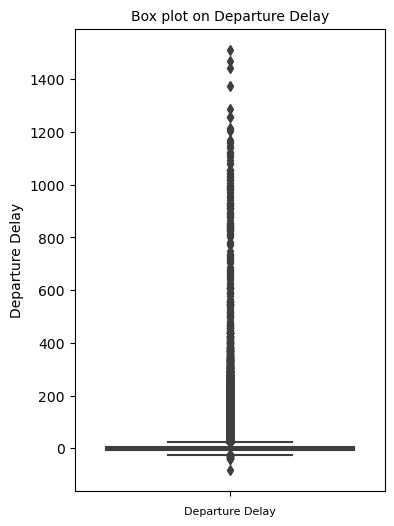

In [18]:
#Setting plot size
plt.figure(figsize=(4,6))
#Creating box plot
sns.boxplot(y=regular["Departure Delay"], color="brown")
#Setting Title
plt.title('Box plot on Departure Delay', fontsize=10)
#Setting X-label
plt.xlabel("Departure Delay", fontsize=8)
plt.savefig('Output/Box-Departure.png',bbox_inches='tight')
plt.show()

There are many outliers. So, I want to calculate the upper whisker and lower whisker and then see how many values lie outside the whiskers range

In [19]:
#Arrival Delay
#Q1, Q3
arr_q1,arr_q3=np.percentile(regular["Arrival Delay"],[25,75])
#IQR
arr_iqr=arr_q3-arr_q1
#Lower Whisker
arr_lower_whisker=arr_q1-(1.5)*arr_iqr
#Upper Whisker
arr_upper_whisker=arr_q3+(1.5)*arr_iqr
print("Lower Whisker:",arr_lower_whisker)
print("Upper Whisker:",arr_upper_whisker)

Lower Whisker: -48.0
Upper Whisker: 40.0


In [20]:
#Departure Delay
#Q1, Q3
dep_q1,dep_q3=np.percentile(regular["Departure Delay"],[25,75])
#IQR
dep_iqr=dep_q3-dep_q1
#Lower Whisker
dep_lower_whisker=dep_q1-(1.5)*dep_iqr
#Upper Whisker
dep_upper_whisker=dep_q3+(1.5)*dep_iqr
print("Lower Whisker:",dep_lower_whisker)
print("Upper Whisker:",dep_upper_whisker)

Lower Whisker: -24.0
Upper Whisker: 24.0


In [21]:
print("Values above the Upper Whisker of Arrival Delay: ", sum(regular["Arrival Delay"]>arr_upper_whisker))
print("Values below the Lower Whisker of Arrival Delay: ", sum(regular["Arrival Delay"]<arr_lower_whisker))
print("Values above the Upper Whisker of Departure Delay: ", sum(regular["Departure Delay"]>dep_upper_whisker))
print("Values below the Lower Whisker of Departure Delay: ", sum(regular["Departure Delay"]<dep_lower_whisker))

Values above the Upper Whisker of Arrival Delay:  8689
Values below the Lower Whisker of Arrival Delay:  131
Values above the Upper Whisker of Departure Delay:  13067
Values below the Lower Whisker of Departure Delay:  33


From the above results, we can see that around 8689 rows were above the upper whisker for arrival delay and 13067 for departure delay. This is really huge data and represents 9-13.5% of the original data. Removing these values leads to the loss of useful data. So, I want remove data above 6hrs because flights start compensating travellers once the delay is past 4hrs and 6hrs will be a good point to remove outliers.

In [22]:
#Number of outliers past 360 minutes
print("6hrs+ Arrival Delays:",regular[regular["Arrival Delay"] > 360].shape[0])
print("6hrs+ Departure Delays:",regular[regular["Departure Delay"] > 360].shape[0])

6hrs+ Arrival Delays: 239
6hrs+ Departure Delays: 235


In [23]:
#Based on Arrival Delay -- Removing anything above 360
regular = regular[regular["Arrival Delay"]<=360]
#Based on Departure Delay -- Removing anything above 360
regular = regular[regular["Departure Delay"]<=360]

In [24]:
print("Dataset shape after outliers removal:",regular.shape)

Dataset shape after outliers removal: (96902, 20)


### Multivariate Graphical EDA

I have plotted a pairwise plot between Arrival Delay, Departure Delay, Elapsed Time, Distance and Air Time. A scatterplot is plotter between each pair of columns. This shows the correlation between variables.

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


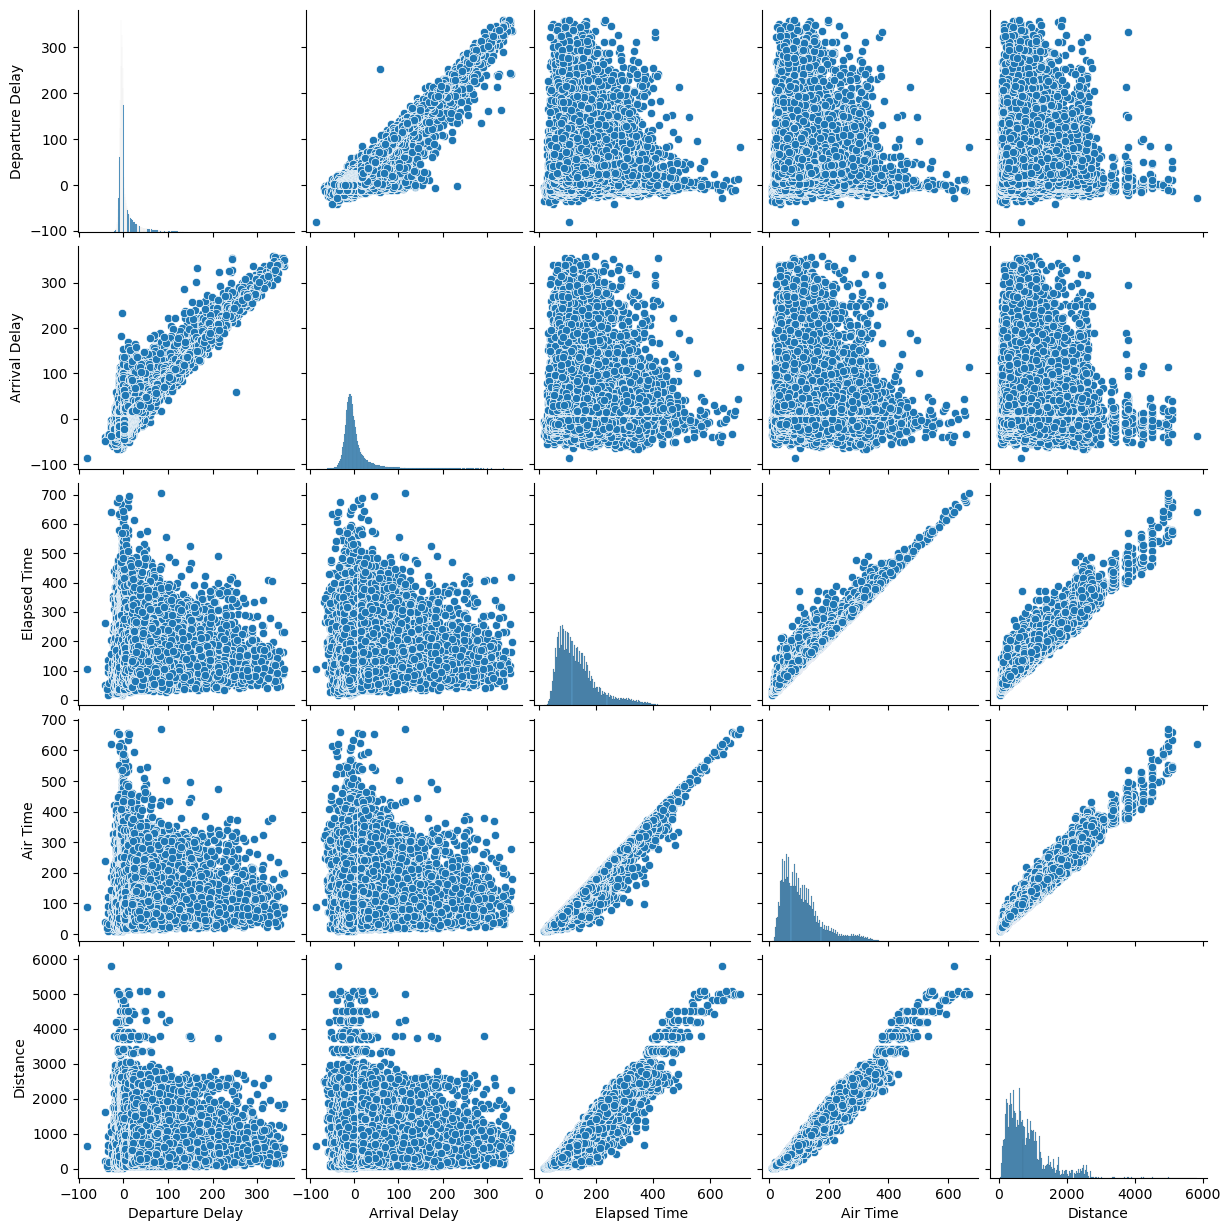

In [25]:
#Pairwise Plot
sns.pairplot(regular.drop(['ID','Date','Airline','Origin','Destination','CRS Departure Time','Departure Time','CRS Arrival Time','Arrival Time','CRS Elapsed Time','Delay_Carrier','Delay_Weather','Delay_NAS','Delay_Security','Delay_ Late Aircraft'],axis=1))
plt.savefig('Output/Regular-Pairplot.png',bbox_inches='tight')

We can see that Arrival Delay and Departure Delay are positively correlated. This makes sense because if a flight is departing late, then it will be arriving late most of the times. We can also observe a positive correlation between Elapsed Time, Air Time and Distance. If the distance increases, then air time and elapsed time increases if there is no difference in the type of flight.

This ends the Exploratory Data Analysis of Regular Flights. We have seen and discussed some important observations. Now, I am saving the dataframe free of outliers to a csv file.

In [26]:
#Saving the dataframe as a csv file
regular.to_csv("EDA-Regular Flights.csv", index=False)

## EDA on Cancelled Flights

In [27]:
#loading the cancelled flights data
cancelled=pd.read_csv("Cleaned-Cancelled Flights.csv")

In [28]:
#viewing the first 5 rows of the dataframe
cancelled.head()

,Date,Airline,Origin,Destination,Cancellation Code,CRS Elapsed TIme,Distance,Cancellation_ID,CRS Departure Time,CRS Arrival Time
0,3/18/2020 0:00,Southwest Airlines Co.,Chicago,Oakland,D,280,1844,473,12/30/1899 8:10:00 PM,12/30/1899 10:50:00 PM
1,3/18/2020 0:00,Southwest Airlines Co.,Nashville,New York,D,130,764,478,12/30/1899 5:50:00 AM,12/30/1899 9:00:00 AM
2,3/19/2020 0:00,Southwest Airlines Co.,New York,Chicago,D,160,725,484,12/30/1899 6:35:00 PM,12/30/1899 8:15:00 PM
3,3/19/2020 0:00,Southwest Airlines Co.,San Jose,Las Vegas,D,80,386,488,12/30/1899 1:15:00 PM,12/30/1899 2:35:00 PM
4,3/19/2020 0:00,Southwest Airlines Co.,Chicago,Kansas City,D,80,405,489,12/30/1899 5:50:00 PM,12/30/1899 7:10:00 PM


In [29]:
#shape
print("Number of rows:",cancelled.shape[0])
print("Number of columns:",cancelled.shape[1])

Number of rows: 2627
Number of columns: 10


### Univariate Non-Graphical EDA

Below code provides information about the non-null values and data type of each column in the dataset

In [30]:
cancelled.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                2627 non-null   object
 1   Airline             2627 non-null   object
 2   Origin              2627 non-null   object
 3   Destination         2627 non-null   object
 4   Cancellation Code   2627 non-null   object
 5   CRS Elapsed TIme    2627 non-null   int64 
 6   Distance            2627 non-null   int64 
 7   Cancellation_ID     2627 non-null   int64 
 8   CRS Departure Time  2627 non-null   object
 9   CRS Arrival Time    2627 non-null   object
dtypes: int64(3), object(7)
memory usage: 205.4+ KB


We can see that there are no null values in the dataset as they were throughly addressed in the Power BI. Below code provides the count, mean, standard deviation and 5 values of a box plot namely minimum, Quartile-1, Median, Quartile-3 and Maximum of that column

In [31]:
cancelled.describe()

,CRS Elapsed TIme,Distance,Cancellation_ID
count,2627.000000,2627.000000,2627.000000
mean,138.208603,769.228778,1314.000000
std,66.789189,541.975461,758.493902
min,32.000000,45.000000,1.000000
25%,90.000000,367.000000,657.500000
50%,125.000000,642.000000,1314.000000
75%,166.000000,997.000000,1970.500000
max,511.000000,4213.000000,2627.000000


### Univariate Graphical EDA

**Categorical Data:** I have plotted barplots for categorical data to understand which airline/city is accounting to most flight cancellations. I have plotted a line chart to see the trend of number of flights cancellations over the years

This below line chart gives the information about number of flight cancellations per year. I have extracted counts for each year and plotted a line chart

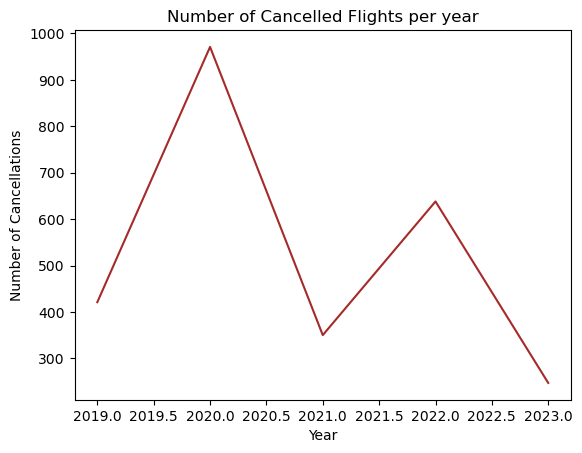

In [32]:
#Extract years to plot a graph
dates = pd.to_datetime(cancelled['Date'])
years = dates.dt.year
#getting years and cancellation counts
year=years.value_counts(sort=False).sort_index().index.values
count=years.value_counts(sort=False).sort_index().values
#Plotting a line plot
plt.plot(year, count, color="brown")
#setting names to the axes
plt.xlabel("Year")
plt.ylabel("Number of Cancellations")
#setting title
plt.title("Number of Cancelled Flights per year")
plt.savefig('Output/Cancelled-Year.png',bbox_inches='tight')
plt.show()

**For the Airline column:** This gives the information about number of flights that each airline cancelled

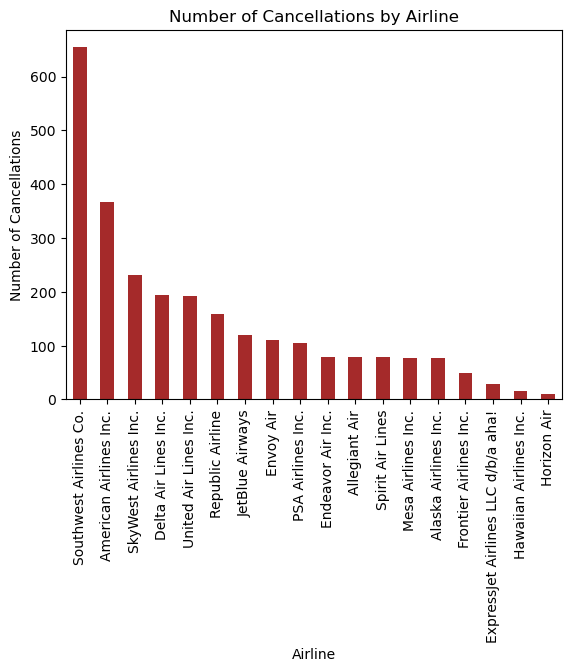

In [33]:
#plotting a bar plot
cancelled['Airline'].value_counts().plot.bar(color="brown")
#setting names to the axes
plt.xlabel("Airline")
plt.ylabel("Number of Cancellations")
#setting title
plt.title("Number of Cancellations by Airline")
plt.savefig('Output/Cancelled-Airline.png',bbox_inches='tight')
plt.show()

**For the Origin column:** This gives the information about number of cancelled flights from a particular city. Here, only top-10 cities were taken to avoid cluttering

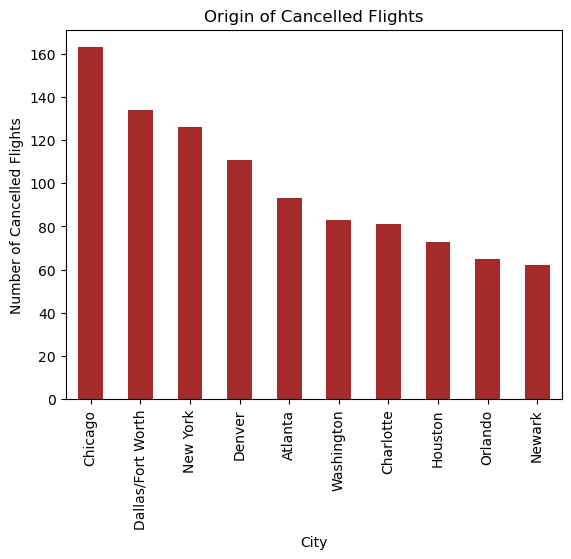

In [34]:
#plotting a bar plot
cancelled['Origin'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Cancelled Flights")
#setting the title
plt.title("Origin of Cancelled Flights")
plt.savefig('Output/Cancelled-Origin.png',bbox_inches='tight')
plt.show()

**For the Destination column:** This gives the information about number of cancelled flights travelling to a particular city. Only top-10 cities were taken to avoid cluttering.

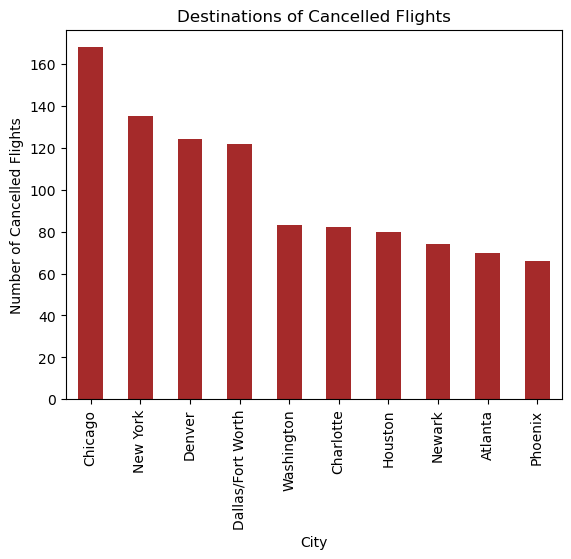

In [35]:
#plotting a bar plot
cancelled['Destination'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Cancelled Flights")
#setting the title
plt.title("Destinations of Cancelled Flights")
plt.savefig('Output/Cancelled-Destination.png',bbox_inches='tight')
plt.show()

**Numerical Data:** I have plotted histograms to see the distribution of the data. Only two numerical column exists in this dataset. They are Distance and CRS Elapsed Time

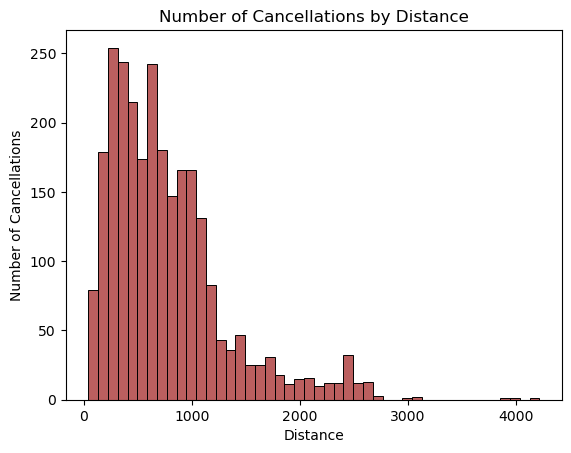

In [36]:
#Plotting a histogram
sns.histplot(cancelled['Distance'], color="brown")
#Setting axes labels
plt.ylabel("Number of Cancellations")
#Setting title
plt.title("Number of Cancellations by Distance")
plt.savefig('Output/Cancelled-Distance.png',bbox_inches='tight')
plt.show()

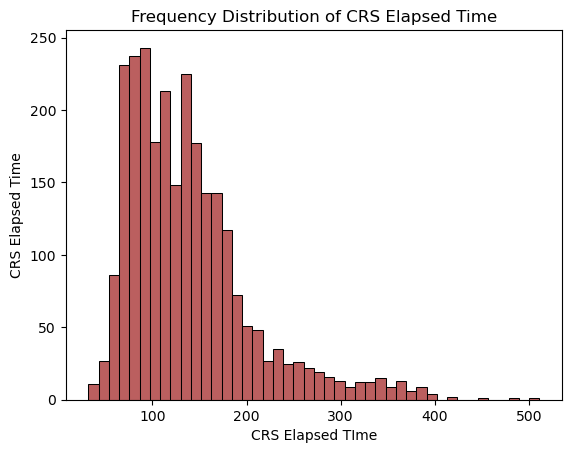

In [37]:
#Plotting a histogram
sns.histplot(cancelled['CRS Elapsed TIme'], color="brown")
#Setting axes labels
plt.ylabel("CRS Elapsed Time")
#Setting title
plt.title("Frequency Distribution of CRS Elapsed Time")
plt.savefig('Output/Cancelled-CRS Elapsed Time.png',bbox_inches='tight')
plt.show()

Here there is very less data after 2800 miles. The same if the case with CRS elapsed time after 400 minutes. I want to check what the upper whisker will be fot this data. If it is something more than the two marks mentioned above, the outliers will be removed. Else, the rows with more than 2800 miles will be removed as the data is continous till that point.

In [38]:
#Distance
#Q1, Q3
dis_q1,dis_q3=np.percentile(cancelled["Distance"],[25,75])
#IQR
dis_iqr=dis_q3-dis_q1
#Upper Whisker
dis_upper_whisker=dis_q3+(1.5)*dis_iqr
print("Upper Whisker:",dis_upper_whisker)

Upper Whisker: 1942.0


In [39]:
#CRS Elapsed Time
#Q1, Q3
ela_q1,ela_q3=np.percentile(regular["CRS Elapsed Time"],[25,75])
#IQR
ela_iqr=ela_q3-ela_q1
#Upper Whisker
ela_upper_whisker=ela_q3+(1.5)*ela_iqr
print("Upper Whisker:",ela_upper_whisker)

Upper Whisker: 297.5


In [40]:
print("Values above the Upper Whisker of Distance: ", sum(cancelled["Distance"]>dis_upper_whisker))
print("Values above the Upper Whisker of CRS Elapsed Time: ", sum(cancelled["CRS Elapsed TIme"]>ela_upper_whisker))

Values above the Upper Whisker of Distance:  135
Values above the Upper Whisker of CRS Elapsed Time:  103


From the above results, we can see that around 135 rows were above the upper whisker for Distance and 103 for CRS Elapsed Time. This is really huge data and represents ~5% of the original data. Removing these values leads to the loss of useful data. So, I want remove data above 2800 miles for distance and 400 min for CRS elapsed time as the data stopped being continuous after that.

In [41]:
print("Cancellations above 2800 miles:",cancelled[cancelled["Distance"] > 2800].shape[0])
print("Cancellations above 400 minutes:",cancelled[cancelled["CRS Elapsed TIme"] > 400].shape[0])

Cancellations above 2800 miles: 6
Cancellations above 400 minutes: 5


In [42]:
cancelled = cancelled[cancelled["Distance"]<=2800]
cancelled = cancelled[cancelled["CRS Elapsed TIme"]<=400]

In [43]:
print("Dataset shape after outliers removal:",cancelled.shape)

Dataset shape after outliers removal: (2620, 10)


### Multivariate Graphical EDA

I have plotted a scatterplot between Distance and CRS Elapsed Time. A positive correlationship was shown between the columns

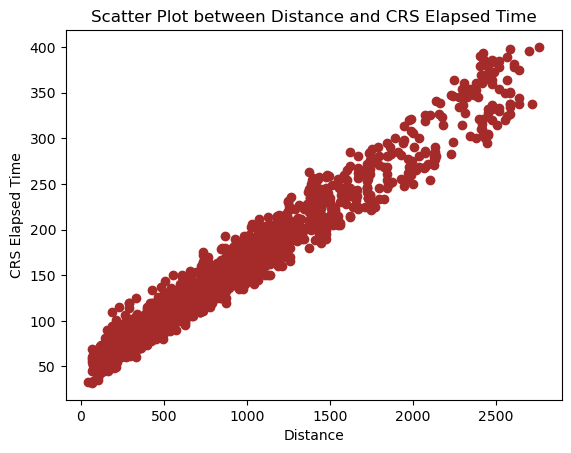

In [44]:
#Plotting a scatter plot
plt.scatter(cancelled["Distance"],cancelled["CRS Elapsed TIme"], color="brown")
#Setting title
plt.title("Scatter Plot between Distance and CRS Elapsed Time")
#Setting axes labels
plt.xlabel("Distance")
plt.ylabel("CRS Elapsed Time")
plt.savefig('Output/Cancelled-Scatter.png',bbox_inches='tight')
plt.show()

This ends the Exploratory Data Analysis of Cancelled Flights. We have seen and discussed some important observations. Now, I am saving the dataframe free of outliers to a csv file.

In [45]:
cancelled.to_csv("EDA-Cancelled Flights.csv", index=False)

## EDA on Diverted Flights

In [46]:
#loading the diverted flights data
diverted = pd.read_csv("Cleaned-Diverted Flights.csv")

In [47]:
#viewing the first 5 rows of the dataframe
diverted.head()

,Date,Airline,Origin,Destination,Departure Delay,Distance,Diverted_ID,CRS Departure Time,Departure Time,CRS Arrival Time,Arrival Time,CRS_ELAPSED_TIME
0,1/5/2019 0:00,American Airlines Inc.,Phoenix,Portland,1,1009,1,12/30/1899 9:31:00 PM,12/30/1899 9:32:00 PM,12/30/1899 11:21:00 PM,12/30/1899 1:59:00 AM,170
1,1/12/2019 0:00,American Airlines Inc.,New York,San Diego,-5,2446,2,12/30/1899 5:50:00 PM,12/30/1899 5:45:00 PM,12/30/1899 9:15:00 PM,12/30/1899 10:00:00 PM,385
2,1/24/2019 0:00,United Air Lines Inc.,Houston,Fort Lauderdale,-10,966,3,12/30/1899 12:00:00 PM,12/30/1899 11:50:00 AM,12/30/1899 3:29:00 PM,12/30/1899 5:16:00 PM,149
3,2/11/2019 0:00,SkyWest Airlines Inc.,Atlanta,Charleston/Dunbar,-3,363,4,12/30/1899 9:11:00 AM,12/30/1899 9:08:00 AM,12/30/1899 10:35:00 AM,12/30/1899 1:54:00 PM,84
4,2/14/2019 0:00,Alaska Airlines Inc.,New York,Los Angeles,-2,2475,5,12/30/1899 10:55:00 AM,12/30/1899 10:53:00 AM,12/30/1899 2:30:00 PM,12/30/1899 4:52:00 PM,395


In [48]:
#shape
print("Number of rows:",diverted.shape[0])
print("Number of columns:",diverted.shape[1])

Number of rows: 197
Number of columns: 12


### Univariate Non-Graphical EDA

Below code provides information about the non-null values and data type of each column in the dataset

In [49]:
diverted.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Date                197 non-null    object
 1   Airline             197 non-null    object
 2   Origin              197 non-null    object
 3   Destination         197 non-null    object
 4   Departure Delay     197 non-null    int64 
 5   Distance            197 non-null    int64 
 6   Diverted_ID         197 non-null    int64 
 7   CRS Departure Time  197 non-null    object
 8   Departure Time      197 non-null    object
 9   CRS Arrival Time    197 non-null    object
 10  Arrival Time        197 non-null    object
 11  CRS_ELAPSED_TIME    197 non-null    int64 
dtypes: int64(4), object(8)
memory usage: 18.6+ KB


We can see that there are no null values in the dataset as they were throughly addressed in the Power BI. Below code provides the count, mean, standard deviation and 5 values of a box plot namely minimum, Quartile-1, Median, Quartile-3 and Maximum of that column

In [50]:
diverted.drop(["Diverted_ID"], axis=1).describe()

,Departure Delay,Distance,CRS_ELAPSED_TIME
count,197.000000,197.000000,197.000000
mean,20.218274,978.593909,164.060914
std,47.486605,621.382665,76.804990
min,-16.000000,73.000000,40.000000
25%,-4.000000,516.000000,114.000000
50%,1.000000,848.000000,150.000000
75%,22.000000,1201.000000,194.000000
max,297.000000,2717.000000,427.000000


### Univariate Graphical EDA

**Categorical Data:** I have plotted barplots for categorical data to understand which airline/city is accounting to most flight diversions. I have plotted a line chart to see the trend of number of flights over the years

This below line chart gives the information about number of flight diversions per year. I have extracted counts for each year and plotted a line chart

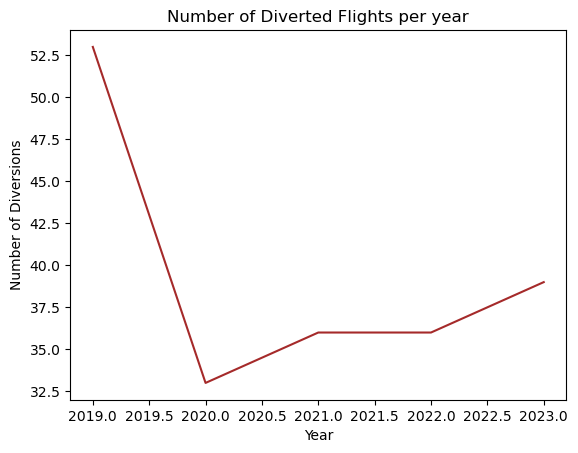

In [51]:
#Extract years to plot a graph
dates = pd.to_datetime(diverted['Date'])
years = dates.dt.year
#getting years and counts
year=years.value_counts(sort=False).sort_index().index.values
count=years.value_counts(sort=False).sort_index().values
#Plotting a line plot
plt.plot(year, count, color="brown")
#setting names to the axes
plt.xlabel("Year")
plt.ylabel("Number of Diversions")
#setting title
plt.title("Number of Diverted Flights per year")
plt.savefig('Output/Diverted-Year.png',bbox_inches='tight')
plt.show()

**For the Airline column:** This gives the information about number of flights that each airline diverted

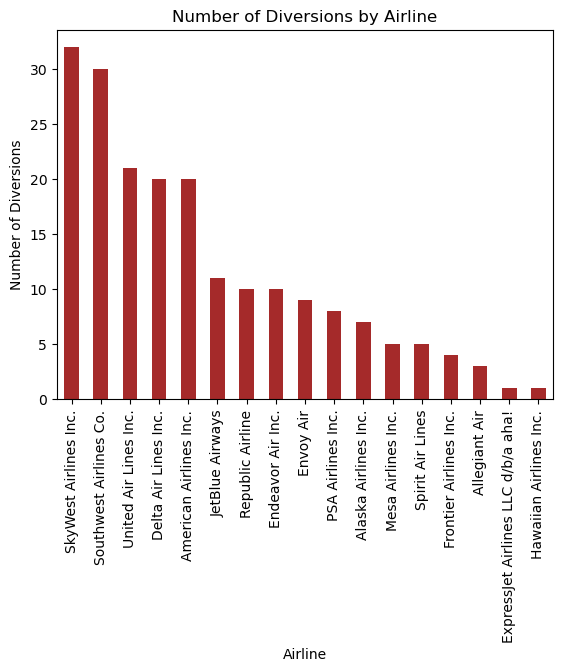

In [52]:
#plotting a bar plot
diverted['Airline'].value_counts().plot.bar(color="brown")
#setting names to the axes
plt.xlabel("Airline")
plt.ylabel("Number of Diversions")
#setting title
plt.title("Number of Diversions by Airline")
plt.savefig('Output/Diverted-Airline.png',bbox_inches='tight')
plt.show()

**For the Origin column:** This gives the information about number of diverted flights originating from a particular city.

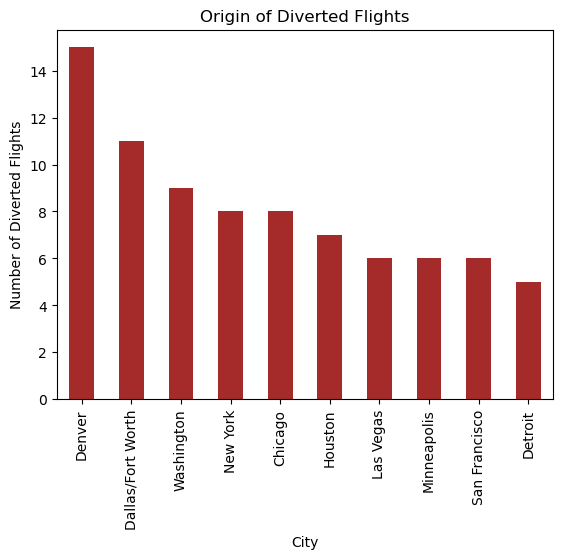

In [53]:
#plotting a bar plot
diverted['Origin'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Diverted Flights")
#setting the title
plt.title("Origin of Diverted Flights")
plt.savefig('Output/Diverted-Origin.png',bbox_inches='tight')
plt.show()

**For the Destination column:** This gives the information about number of diverted flights travelling to a particular city

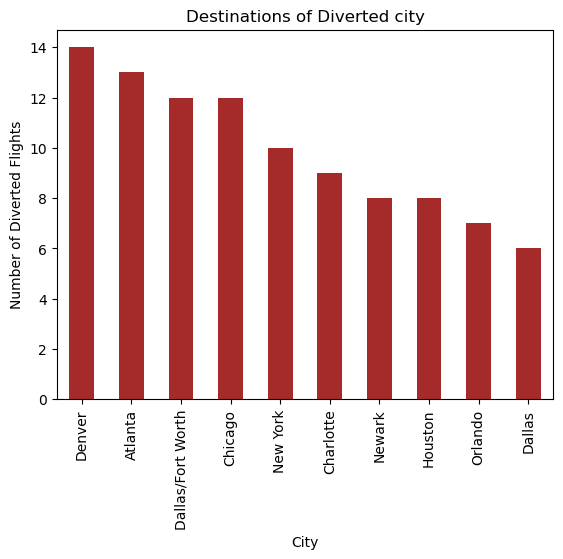

In [54]:
#plotting a bar plot
diverted['Destination'].value_counts().iloc[0:10].plot.bar(color="brown")
#setting names to the axes
plt.xlabel("City")
plt.ylabel("Number of Diverted Flights")
#setting the title
plt.title("Destinations of Diverted city")
plt.savefig('Output/Diverted-Destination.png',bbox_inches='tight')
plt.show()

**Numerical Data:** I have plotted histograms to see the distribution of the data. Only two numerical column exists in this dataset. They are Distance and CRS Elapsed Time

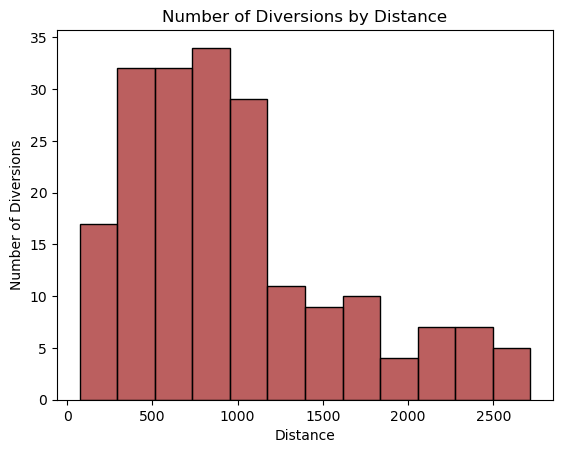

In [55]:
#Plotting a histogram
sns.histplot(diverted['Distance'], color="brown")
#Setting axes labels
plt.ylabel("Number of Diversions")
#Setting title
plt.title("Number of Diversions by Distance")
plt.savefig('Output/Diverted-Distance.png',bbox_inches='tight')
plt.show()

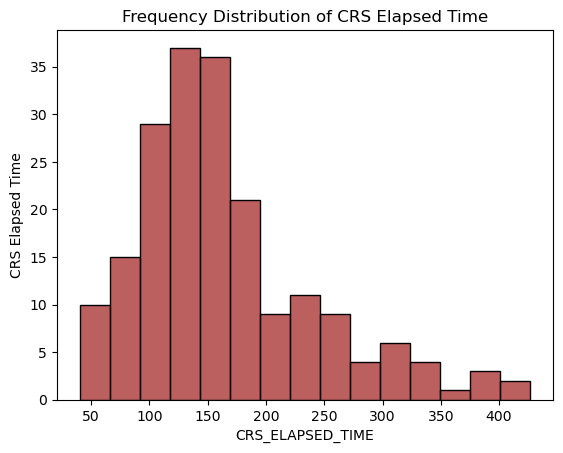

In [56]:
#Plotting a histogram
sns.histplot(diverted['CRS_ELAPSED_TIME'], color="brown")
#Setting axes labels
plt.ylabel("CRS Elapsed Time")
#Setting title
plt.title("Frequency Distribution of CRS Elapsed Time")
plt.savefig('Output/Diverted-CRS Elapsed Time.png',bbox_inches='tight')
plt.show()

### Multivariate Graphical EDA

I have plotted a correlation plot for the numerical data available in Diverted data. A positive correlationship was shown between the Distance and CRS Elapsed Time.

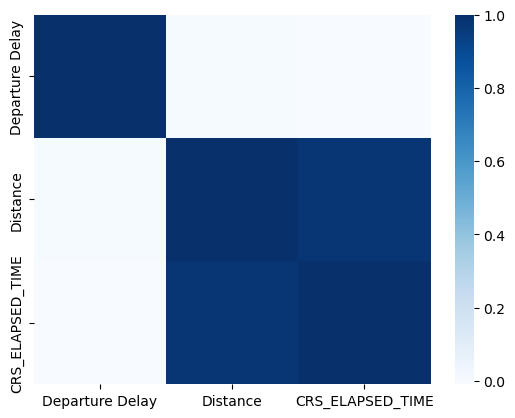

In [57]:
corr = diverted[["Departure Delay", "Distance","CRS_ELAPSED_TIME"]].corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, cmap="Blues")
plt.savefig('Output/Diverted-Correlation.png',bbox_inches='tight')
plt.show()

This ends the Exploratory Data Analysis phase of the project. By performing the EDA, I was able to formulate the following hypothesis.

1.	Do the busiest airports face more cancellations? Is the cancellation rate higher for the busiest airport? Also, which type of cancellation is more common?

2.	It was observed that the number of flights reduced after 2019 but gradually increased over the years. So, do flight delays follow the same trend? What is the most significant delay factor?

3.	Do the biggest operating airlines produce the most cancellations, diversions, and delays?

I will answer these hypothesis by loading the "EDA-Regular Flights.csv", "EDA-Cancelled Flights.csv" and "Cleaned-Diverted.csv" into the Power BI and visualizing the data